# CS 135 day02: Basics of Regression Methods: Solution

# Objectives

* Practice loading data from CSV files and manipulating that data with Pandas and NumPy
* Try out sklearn's linear regression on a dataset with 1-dim. features and many features
* Try out sklearn's k-nearest neighbor regression on a dataset with 1-dim. features and many features
* Try out comparing models using mean squared error as a performance metric

# What to do

Download the *abalone* dataset from our course starter-code repo here:

* Dataset CSV files: https://github.com/tufts-ml-courses/cs135-26s-assignments/tree/12pm/labs/data_abalone
* Dataset README: https://github.com/tufts-ml-courses/cs135-26s-assignments/tree/12pm/labs/data_abalone/README.md

In class (or later at home), work your way through this notebook. 

Each "part" has a structure like this:

* First, some prefilled content so you can learn how to do basic ML operations with sklearn.
* Second, some simple exercises to try to figure things out yourself


# Outline

* [Part 1: Linear Regression with 1-dim. features](#part1)
* * Real Task: Regression of 'rings' given 'length' using abalone dataset
* * Exercise 1a: Reproduce the `predict` method
* [Part 2: Linear Regression with 3-dim. features](#part2)
* * Real Task: Regression of 'rings' given 'length', 'height', 'weight'
* * Exercise 2a: Reproduce the `predict` method
* * Exercise 2b: Compare mean squared error on training set with model from part 1
* [Part 3: K-nearest neighbor regression](#part3)
* * Real Task: Regression of 'rings' given 'length'
* * Exercise 3a: How does training set error vary with number of neighbors?
* * Exercise 3b: Repeat using all available features (not just length)
* * Exercise 3c: Reproduce the `predict` method for k-NN


# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import sklearn

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

In [ ]:
os.getcwd()

'/Users/harrybendekgey/spring26/cs135-26s-assignments/labs'

In [ ]:
# If running in cloud on Google colab, be sure to acquire the required dataset
if os.getenv("COLAB_RELEASE_TAG") and not os.path.exists('data_abalone'):
    !git clone https://github.com/tufts-ml-courses/cs135-26s-assignments.git
    os.chdir(os.path.join('cs135-26s-assignments', 'labs'))
    !git switch 12pm

if not os.path.exists('data_abalone'):
    raise ValueError("Need to run this script within a valid checkout of the cs135 repo")

<a id="part1"></a>

# Part 1: Simple Linear Regression with 1-dim. features



### Goal: Predict 'rings' outcome given 'length' of abalone

We'll do this in a few easy steps below:

1) Load in 'x' training data, the 'length' of each abalone

2) Load in 'y' training data, the 'rings' count of each abalone

3) Train a linear regression model by calling 'fit'

4) Make predictions using this model by calling 'predict'

### Step 1: Load in 'x', the inputs for our regression task

In [ ]:
# Show the first 5 lines of this CSV:

with open('data_abalone/x_train.csv', 'r') as f:
    for line in f.readlines()[:5]:
        print(line.strip())

is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0.0,0.43,0.325,0.09,0.425,0.217,0.087,0.095
0.0,0.575,0.445,0.135,0.883,0.381,0.2035,0.26
0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275
0.0,0.48,0.35,0.1,0.519,0.2365,0.1275,0.126


In [ ]:
# Load in the data into a Panda's dataframe called 'x_df'
x_df = pd.read_csv('data_abalone/x_train.csv')

In [ ]:
# Show first 3 rows
x_df.head(3)

,is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0,0.0,0.430,0.325,0.090,0.4250,0.2170,0.0870,0.095
1,0.0,0.575,0.445,0.135,0.8830,0.3810,0.2035,0.260
2,0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275


In [ ]:
# Print summary stats
x_df.describe()

,is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
count,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000,3176.000000
mean,0.360516,0.523352,0.407434,0.139406,0.824952,0.358798,0.179893,0.237566
std,0.480226,0.119343,0.098652,0.042651,0.487228,0.221327,0.109260,0.138865
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.450000,0.350000,0.115000,0.442875,0.186500,0.093000,0.130000
50%,0.000000,0.545000,0.425000,0.140000,0.800250,0.335500,0.170000,0.229500
75%,1.000000,0.615000,0.480000,0.165000,1.146625,0.498500,0.248500,0.326125
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [ ]:
# Show how to access column names
for col in x_df.columns:
    print(col)

is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


In [ ]:
# Convert from pandas DataFrame to a numpy array with N rows and F columns
x_NF = x_df.values.copy()

print(type(x_NF))

<class 'numpy.ndarray'>


In [ ]:
print(x_NF.shape)

(3176, 8)


In [ ]:
print(x_NF.dtype)

float64


In [ ]:
# Convert only the 'length' column into a numpy array

xlength_N1 = x_df.loc[:, ['length_mm']].values.copy()

print(xlength_N1.shape)

(3176, 1)


OK, now we've got our input! Time for step 2....

### Step 2: Load in 'y', the output of our regression task

In [ ]:
y_df = pd.read_csv('data_abalone/y_train.csv')

In [ ]:
# Show first 6 rows
y_df.head(6)

,rings
0,7
1,11
2,12
3,7
4,11
5,4


In [ ]:
# Print summary stats
y_df.describe()

,rings
count,3176.000000
mean,9.902393
std,3.205887
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [ ]:
y_N1 = y_df.loc[:, ['rings']].values.copy()

In [ ]:
y_N1.shape

(3176, 1)

### Step 3: Fit a linear regression model, using sklearn

In [ ]:
import sklearn.linear_model

In [ ]:
# Construct the regression "object"
# The variable 'lin_regr' here is an "instance" of the LinearRegression class

lin_regr = sklearn.linear_model.LinearRegression()

See the documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression>


Any constructed regressor in sklearn (like 'lin_regr') has two useful methods:
* 'fit' method
* 'predict' method (only works after 'fit' is called)

The 'fit' method will *TRAIN* the model

Practically, this method call will 

1) Estimate weight coefficients $w$ and bias/intercept $b$ to minimize mean squared error

2) Updates internal state of the object with these estimated values.

For linear regression specifically:

* an attribute called `coef_` holds the weights
* an attribute called `intercept_` holds the intercept value

In [ ]:
lin_regr.fit(xlength_N1, y_N1);

What changed after calling fit?

The *internal state* of the object was updated.

We can see the *internal state* via the "coef" attribute (the *slope* parameter) and the "intercept" attribute (aka *bias* parameter)

In [ ]:
lin_regr.coef_

array([[14.77184885]])

In [ ]:
lin_regr.intercept_

array([2.17152073])

How would you know what an object can do??

Pro tip: in an active Jupyter notebook, you can use *tab completion* to interactively inspect an object

Just type "lin_regr." and then press the <tab> key.
    
You should see a pop up menu that let's you see what methods and attributes are accessible, like this:
    
![Image of tab completion](https://www.cs.tufts.edu/comp/135/2020f/images/day02_jupyter_object_inspect_on_tab.png)

In [ ]:
# Try it here, add "." plus <tab>
lin_regr

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Step 4: Make predictions using this trained linear regression model

In [ ]:
# Prepare to evaluate predictions at several possible length values:
G = 7
x_grid_G = np.asarray([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
print(x_grid_G)

[0.   0.25 0.5  0.75 1.   1.25 1.5 ]


In [ ]:
# Turn this into a G x 1 2-dim array, since sklearn *always* expects feature input to be 2-dim
x_grid_G1 = x_grid_G[:,np.newaxis]

Now, we call `predict`, which, when given 2-dim array with shape (G,F) of features, will return a 2-dim array of size (G, 1) of *predicted values*

In [ ]:
yhat_lin_G1 = lin_regr.predict(x_grid_G1)
print(yhat_lin_G1)
print(yhat_lin_G1.shape)

[[ 2.17152073]
 [ 5.86448295]
 [ 9.55744516]
 [13.25040737]
 [16.94336959]
 [20.6363318 ]
 [24.32929401]]
(7, 1)


### Step 5: Plot the *predicted* values side by side with the observed training data

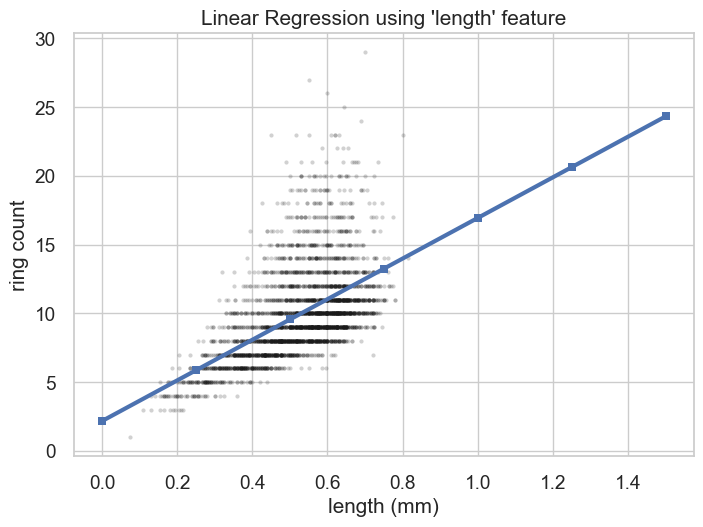

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_lin_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title("Linear Regression using 'length' feature");

### Step 6: Numerically estimating the quality of your fit via MSE/MAE/rMSE

In [ ]:
# the quality of your fit can be measured via rMSE, MSE, and MAE

print("Mean Squared Error:")
print(sklearn.metrics.mean_squared_error(y_N1, lin_regr.predict(xlength_N1)))

print("root Mean Squared Error:")
print(sklearn.metrics.root_mean_squared_error(y_N1, lin_regr.predict(xlength_N1)))

print("Mean Absolute Error:")
print(sklearn.metrics.mean_absolute_error(y_N1, lin_regr.predict(xlength_N1)))

Mean Squared Error:
7.167580293483765
root Mean Squared Error:
2.6772337016935532
Mean Absolute Error:
1.9480239844888256


# Exercises for Part 1

### Exercise 1a (code): Which input feature gives us the best predictions? Does it matter which metric we use?

In [ ]:
# TODO pick a metric (find a partner and pick a different metric than them!)
# Try training on different features in the dataset. Which is giving you the smallest errors?


# Recall that the list of features are
for col in x_df.columns:
    print(col)

# and you can grab a particular feature using
xlength_N1 = x_df.loc[:, ['length_mm']].values.copy()


is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


In [ ]:
lin_regr = sklearn.linear_model.LinearRegression()
for col in x_df.columns:
    print(col)
    x_N1 = x_df.loc[:, [col]].values.copy()
    lin_regr.fit(x_N1, y_N1)
    print("Mean Squared Error:")
    print(sklearn.metrics.mean_squared_error(y_N1, lin_regr.predict(x_N1)))
    
    print("root Mean Squared Error:")
    print(sklearn.metrics.root_mean_squared_error(y_N1, lin_regr.predict(x_N1)))
    
    print("Mean Absolute Error:")
    print(sklearn.metrics.mean_absolute_error(y_N1, lin_regr.predict(x_N1)))
    print("")

is_male
Mean Squared Error:
9.94316661018239
root Mean Squared Error:
3.1532787079772047
Mean Absolute Error:
2.331761399917115

length_mm
Mean Squared Error:
7.167580293483765
root Mean Squared Error:
2.6772337016935532
Mean Absolute Error:
1.9480239844888256

diam_mm
Mean Squared Error:
6.932539749349011
root Mean Squared Error:
2.6329716575286204
Mean Absolute Error:
1.9104366581638281

height_mm
Mean Squared Error:
7.284233232902238
root Mean Squared Error:
2.6989318688885495
Mean Absolute Error:
1.880846448876798

whole_weight_g
Mean Squared Error:
7.329093860834955
root Mean Squared Error:
2.7072299238954485
Mean Absolute Error:
1.976284727822628

shucked_weight_g
Mean Squared Error:
8.496145699282044
root Mean Squared Error:
2.9148148653528656
Mean Absolute Error:
2.136684339307778

viscera_weight_g
Mean Squared Error:
7.719219697351203
root Mean Squared Error:
2.7783483758073255
Mean Absolute Error:
2.018150955401279

shell_weight_g
Mean Squared Error:
6.307627184159169
root Me

`shell_weight_g` is the best predictor, regardless of what metric we use. However, it's not always the case that a feature which is better for MSE/rMSE is better for MAE as well; see `height_mm` vs `diam_mm` for example. Note that if one feature is better than other wrt to MSE it will *always* be better wrt rMSE, because the difference is just a square root, which cannot take two numbers and change their ordering.

### Exercise 1b (conceptual): Do any features seem to have extreme outliers? Visualize them.

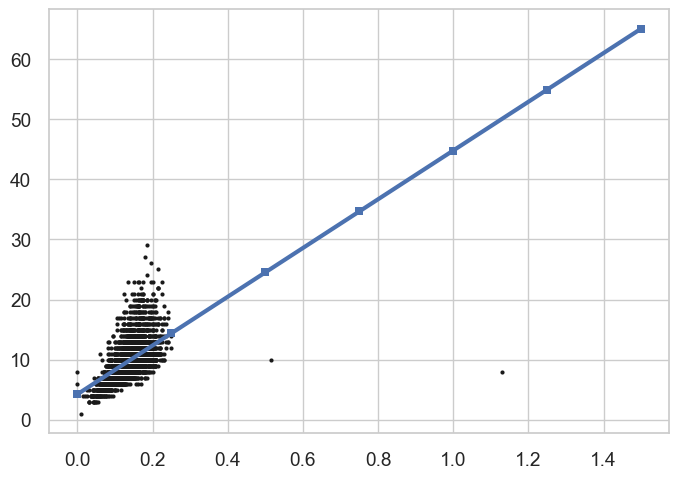

In [ ]:
col = 'height_mm'
x_N1 = x_df.loc[:, [col]].values.copy()
lin_regr.fit(x_N1, y_N1)

x_grid_G = np.asarray([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])[:,np.newaxis]
plt.plot(x_N1, y_N1, 'k.')
plt.plot(x_grid_G, lin_regr.predict(x_grid_G), 'bs-', linewidth=3);
plt.show()

### Exercise 1b (conceptual): How does a linear model handle binary features like `is_male`? How can we interpret the intercept and coefficient in this case?

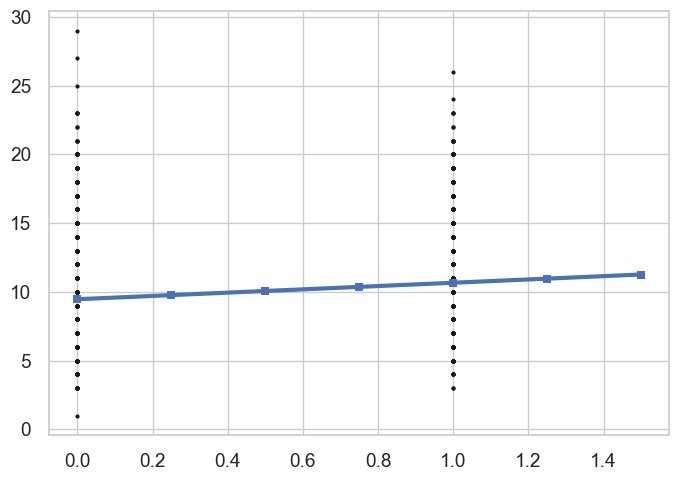

In [ ]:
col = 'is_male'
x_N1 = x_df.loc[:, [col]].values.copy()
lin_regr.fit(x_N1, y_N1)

x_grid_G = np.asarray([0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5])[:,np.newaxis]
plt.plot(x_N1, y_N1, 'k.')
plt.plot(x_grid_G, lin_regr.predict(x_grid_G), 'bs-', linewidth=3);
plt.show()

<a id="part2"></a>

# Part 2: Linear Regression with multiple features

### Goal: Predict 'rings' outcome given 'length', 'height', and 'weight' of abalone

How would we do if we wanted to predict 'rings' given not just length, but also height and weight?

### Prepare the data

We now want our features array to have shape: (n_examples, 3)

Since 3 would let us use length and height and weight

In [ ]:
for col in x_df.columns:
    print(col)

is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


In [ ]:
# Grab relevant columns only, convert to a numeric array
x_N3 = x_df.loc[:, ['length_mm', 'height_mm', 'whole_weight_g']].values.copy()
print(type(x_N3))
print(x_N3.dtype)
print(x_N3.shape)

<class 'numpy.ndarray'>
float64
(3176, 3)


#### Construct the model as an sklearn regressor object

In [ ]:
lin_regr_3dim = sklearn.linear_model.LinearRegression()

#### Fit the model

In [ ]:
lin_regr_3dim.fit(x_N3, y_N1)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
lin_regr_3dim.coef_

array([[ 7.0627805 , 19.64482851,  0.53907213]])

In [ ]:
lin_regr_3dim.intercept_

array([3.02274963])

### Exercise 2 (conceptual): Is your new model using 3-dim features any better than the original model with just length?

In [ ]:
# the quality of your fit can be measured via rMSE, MSE, and MAE

print("Mean Squared Error:")
print(sklearn.metrics.mean_squared_error(y_N1, lin_regr_3dim.predict(x_N3)))

print("root Mean Squared Error:")
print(sklearn.metrics.root_mean_squared_error(y_N1, lin_regr_3dim.predict(x_N3)))

print("Mean Absolute Error:")
print(sklearn.metrics.mean_absolute_error(y_N1, lin_regr_3dim.predict(x_N3)))

Mean Squared Error:
6.889643125325142
root Mean Squared Error:
2.6248129695894793
Mean Absolute Error:
1.889297071820917


It's better than any of the individual models for those features, but not as good as shell weight on its own!

<a id="part3"></a>

# Part 3: K-nearest Neighbor Regression with 1-dim features

### Goal: Try out sklearn's built-in nearest neighbor regressor



In [ ]:
import sklearn.neighbors

In [ ]:
k1nn_regr = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Fit the model
k1nn_regr.fit(xlength_N1, y_N1);

In [ ]:
# Prepare to evaluate predictions at several possible length values:
G = 21
x_grid_G = np.linspace(0, 1.5, G)
print(x_grid_G)

[0.    0.075 0.15  0.225 0.3   0.375 0.45  0.525 0.6   0.675 0.75  0.825
 0.9   0.975 1.05  1.125 1.2   1.275 1.35  1.425 1.5  ]


In [ ]:
x_grid_G1 = np.reshape(x_grid_G, (G, 1))

In [ ]:
# Make predictions on the same grid of x input values
yhat_k1nn_G1 = k1nn_regr.predict(x_grid_G1)

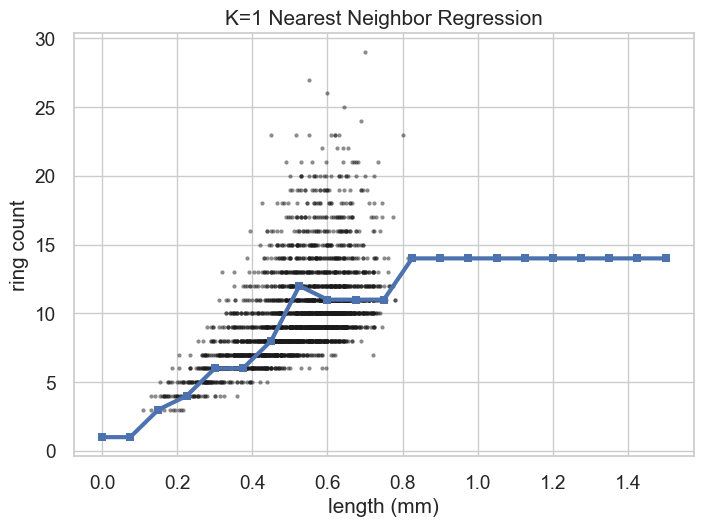

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.5)
plt.plot(x_grid_G, yhat_k1nn_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=1 Nearest Neighbor Regression');

#### Retry with 5 nearest neighbors

In [ ]:
k5nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5, algorithm='brute', metric='euclidean')

In [ ]:
# Fit the model
k5nn_regr.fit(xlength_N1, y_N1);

In [ ]:
# Make predictions on the same grid of x input values
yhat_k5nn_G1 = k5nn_regr.predict(x_grid_G1)

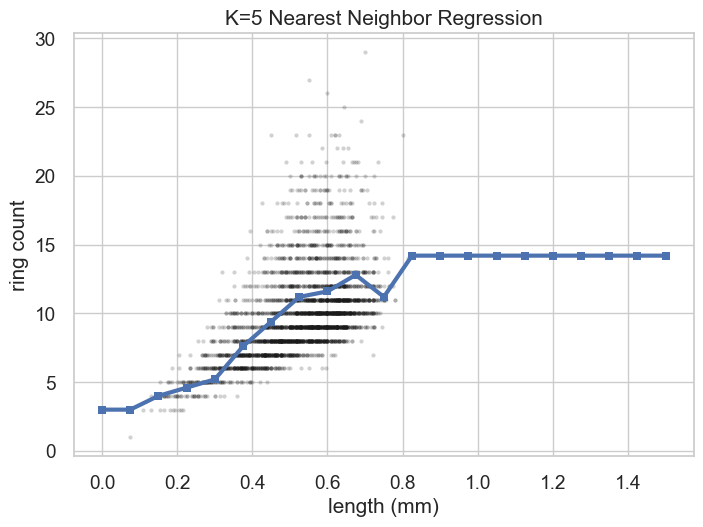

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G1, yhat_k5nn_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=5 Nearest Neighbor Regression');

### Retry with 100 nearest neighbors

In [ ]:
k100nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=100, algorithm='brute', metric='euclidean')

In [ ]:
# Fit the model
k100nn_regr.fit(xlength_N1, y_N1);

# Make predictions on the same grid of x input values
yhat_k100_G1 = k100nn_regr.predict(x_grid_G1)

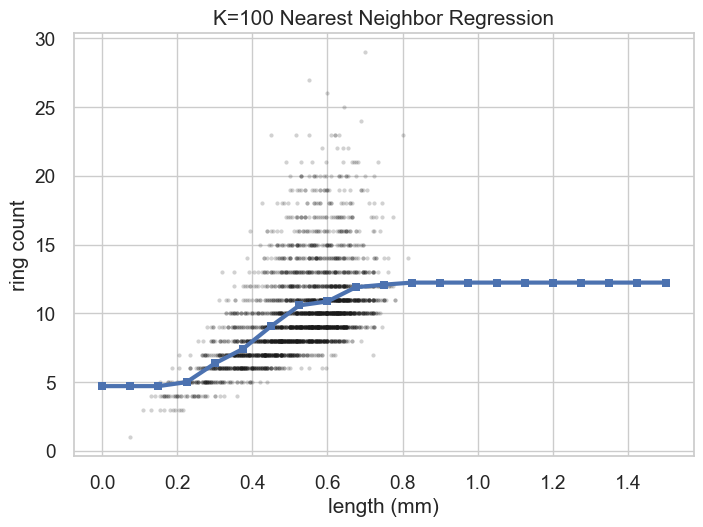

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.2)
plt.plot(x_grid_G1, yhat_k100_G1, 'bs-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('K=100 Nearest Neighbor Regression');

# Exercises for Part 3

### Discussion Question 3(i): What happens when you call `fit` for a k-NN regressor? 

What (if anything) gets estimated or computed?
What (if anything) gets updated as an attribute of the regressor object?

**Solution:** Nothing happens, the k-NN regressor just grabs data, instead of summarizing relationships between features + target with w and b as in Linear regressor.

### Discussion Question 3(ii): k-NN should have a piecewise constant predictions.... why do the plots above look different?

*Hint:* Try a finer grid

In [ ]:
# Increasing the number of points, G, to generate more points  between 0 and 1.5, creating a much finer grid
G = 150
x_grid_fine_G = np.linspace(0, 1.5, G)
print(x_grid_fine_G[:10])
print(x_grid_fine_G.shape)

[0.         0.01006711 0.02013423 0.03020134 0.04026846 0.05033557
 0.06040268 0.0704698  0.08053691 0.09060403]
(150,)


In [ ]:
x_grid_fine_G1 = np.reshape(x_grid_fine_G, (G, 1))
print(x_grid_fine_G1[:10])
print(x_grid_fine_G1.shape)

[[0.        ]
 [0.01006711]
 [0.02013423]
 [0.03020134]
 [0.04026846]
 [0.05033557]
 [0.06040268]
 [0.0704698 ]
 [0.08053691]
 [0.09060403]]
(150, 1)


In [ ]:
# Just doing prediction for finer grid with k1nn, to demonstrate piecewise constant

yhat_k1nn_fine_G1 = k1nn_regr.predict(x_grid_fine_G1)
print(yhat_k1nn_fine_G1[::15])
print(yhat_k1nn_fine_G1.shape)

[[ 1.]
 [ 3.]
 [ 6.]
 [ 8.]
 [12.]
 [11.]
 [14.]
 [14.]
 [14.]
 [14.]]
(150, 1)


Text(0.5, 1.0, 'K=1 Nearest Neighbor Regression (with finer grid)')

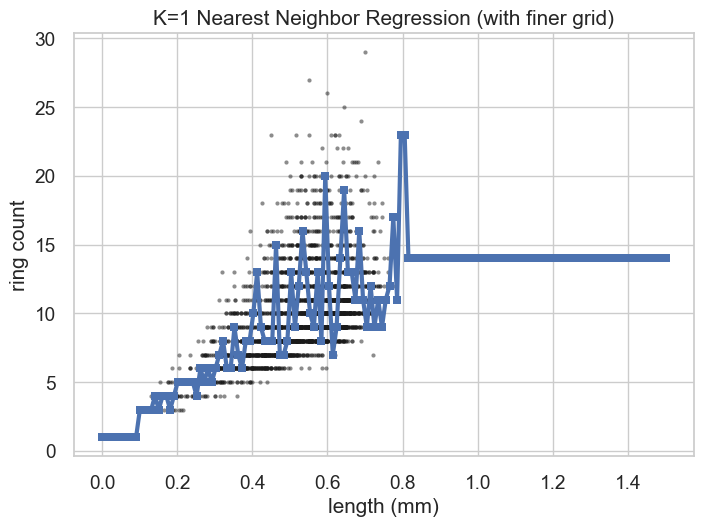

In [ ]:
# Plotting finer grid predictions
# Notice now the plot will visibly demonstrate the piecewise constant property

plt.plot(xlength_N1, y_N1, 'k.', alpha=0.5)
plt.plot(x_grid_fine_G1, yhat_k1nn_fine_G1, 'bs-', linewidth=3)
plt.xlabel('length (mm)'); plt.ylabel('ring count')
plt.title('K=1 Nearest Neighbor Regression (with finer grid)')

### Discussion Question 3(iii): Does the predicted function look smoother or more jagged as K increases? Why does this make sense given how this classifier works?

*Hint*: What should happen in the limit as K -> N?

In [ ]:
# Trying a K = N version 
N, _ = xlength_N1.shape

kMaxnn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=N, algorithm='brute', metric='euclidean')

# Fit the model
kMaxnn_regr.fit(xlength_N1, y_N1)

# Make predictions on the same grid of x input values
yhat_kMax_G1 = kMaxnn_regr.predict(x_grid_G1)
print(yhat_kMax_G1)
print(yhat_kMax_G1.shape)

[[9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]
 [9.90239295]]
(21, 1)


Text(0.5, 1.0, 'K=N Nearest Neighbor Regression')

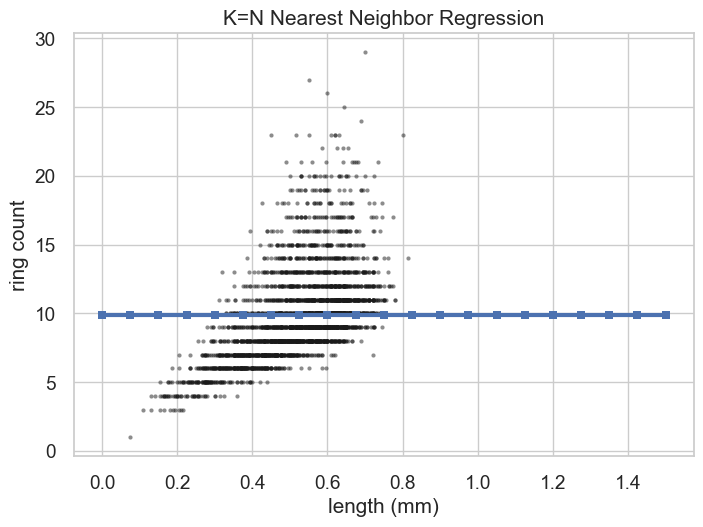

In [ ]:
plt.plot(xlength_N1, y_N1, 'k.', alpha=0.5)
plt.plot(x_grid_G, yhat_kMax_G1, 'bs-', linewidth=3)
plt.xlabel('length (mm)'); plt.ylabel('ring count')
plt.title('K=N Nearest Neighbor Regression')

In [ ]:
np.mean(y_N1)

np.float64(9.902392947103275)

Notice as K -> N for each new point, more neighbors are considered, smoothing predictions out and reducing
the impact of any particular data point towards the prediction. In the extreme case of $K = N$, 
every input you ask to predict on takes the entire training dataset as neighors and simply predicts the 
training dataset mean.

### Exercise 3a (code): Make a plot of the mean squared error on the *training* set as a function of the number of neighbors

In [ ]:
k_list = [1, 3, 5, 7, 9, 11, 15, 21, 35, 51, 75, 101, 151, 201, 501]

knn_mse_tr_list = []
knn_regr_list = []

for k in k_list:
    # Create and fit model with given k
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=k, algorithm='brute', metric='euclidean')
    knn_regr.fit(xlength_N1, y_N1)
    
    # Predict for training set
    yhat_tr_N1 = knn_regr.predict(xlength_N1)
    
    # Calculate MSE
    mse_tr = sklearn.metrics.mean_squared_error(yhat_tr_N1, y_N1)
    
    # Record pass
    knn_mse_tr_list.append(mse_tr)
    knn_regr_list.append(knn_regr)

Text(0.5, 1.0, 'MSE vs. K: For k-NN Regressor')

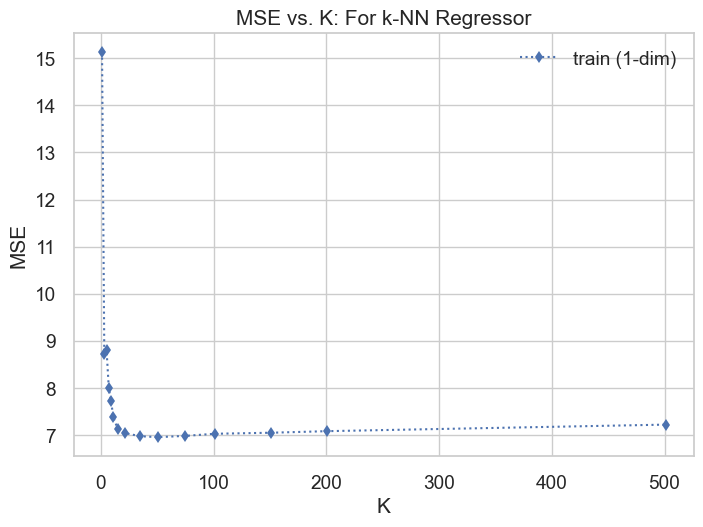

In [ ]:
plt.plot(k_list, knn_mse_tr_list, 'bd:', label='train (1-dim)')
plt.legend(loc='upper right')
plt.xlabel('K')
plt.ylabel("MSE")
plt.title('MSE vs. K: For k-NN Regressor')

This is not quite what we would expect. We would expect training MSE to look like 0 when $K=1$, because everything is its closest neighbor. The problem seems to be that many points are "right on top of each other". 

In [ ]:
# the number of times each value is seen in the data set. 
# The first array is the values seen
# The second array is the number of times each one is seen. There's a lot of repetition!
np.unique_counts(xlength_N1)

UniqueCountsResult(values=array([0.075, 0.11 , 0.13 , 0.14 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 ,
       0.675, 0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715,
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0

If data points are right on top of one another, than a point might not be its own nearest neighbor. See the warning in <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html> for more details.

### Exercise 3b (code): Repeat part 3 using *all* available features (not just length). Does your performance improve?

In [ ]:
k_list = [1, 3, 5, 7, 9, 11, 15, 21, 35, 51, 75, 101, 151, 201, 501]

knn_mse_tr_allF_list = []
knn_regr_allF_list = []

for k in k_list:
    # Create model with given k
    knn_regr = sklearn.neighbors.KNeighborsRegressor(
        n_neighbors=k, algorithm='brute', metric='euclidean')
    
    # Fit using X with all features F
    knn_regr.fit(x_NF, y_N1)
    
    # Predict for training set with all features F
    yhat_tr_N1 = knn_regr.predict(x_NF)
    
    # Calculate MSE
    mse_tr = sklearn.metrics.mean_squared_error(yhat_tr_N1, y_N1)
    
    # Record pass
    knn_mse_tr_allF_list.append(mse_tr)
    knn_regr_allF_list.append(knn_regr)

Text(0.5, 1.0, 'MSE vs. K: For k-NN Regressor')

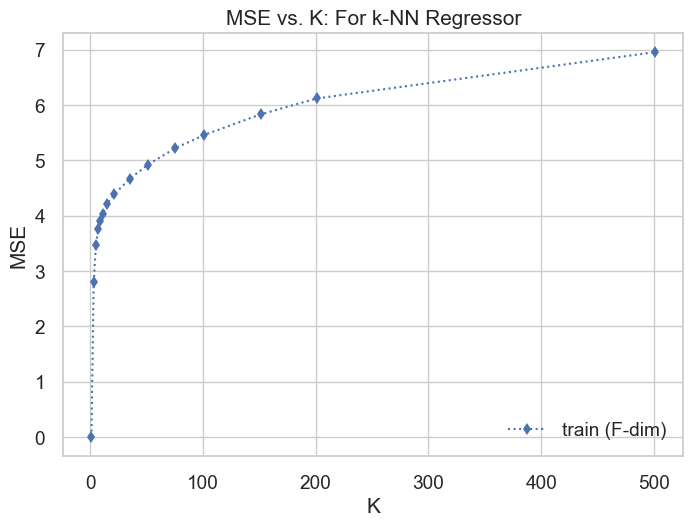

In [ ]:
plt.plot(k_list, knn_mse_tr_allF_list, 'bd:', label='train (F-dim)')
plt.legend(loc='lower right')
plt.xlabel('K')
plt.ylabel("MSE")
plt.title('MSE vs. K: For k-NN Regressor')

It does improve! And now we see behavior we would expect, where MSE goes to 0 as k goes to 1. This is because points might be "right on top of one another" with respect to a single feature, but no two data points are right on top of each other with respect to *every* feature. So ties don't happen in higher dimensions.

# Challenge Yourself

### Exercise 3c (code): Can you write a function to reproduce what happens when you call `predict()` with kNN?